# Project Description 

# Markov Chain Diagram 

<img src="4580 Markov Chain Diagram.png" width="800" height="400">

In [106]:
import numpy as np
import scipy.stats as sc
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output
from time import sleep
import pandas as pd
import math
import random

random.seed(100)

# "Bucket-A" arrays
c1 = [] # class 1
c2 = [] # class 2
c3 = [] # class 3
c4 = [] # class 4
I_s = [] # infected symptomatic
R = [] # all recovered or vaccinated agents

# "Bucket-B" arrays
S = [] # all susceptable agents
I = [] # all infected agents
V = [] # all vaccinated agents

c_every = [c1, c2, c3, c4, I_s]

# array of meeting rates (people met per day) of classes C1, C2, C3, C4, and infected symptomatic (I_s) agents
meeting_rates = [0.2, 0.3, 0.2, 0.05, 0.0714]     

### Classes ###

class Agent:
    # Create class for an agents object
    def __init__(self, class_n, meeting_rate, infected, p, name):
        self.class_n = class_n
        self.previous_class = None 
        self.meeting_rate = meeting_rate
        self.infected = infected
        self.p = p
        self.name = str(name)
    
    def infect(self):
        # Update agent's infected status and remove them from list S
        # Decide if they become symptomatic
        # If symptomatic, adjust meeting rate and move to list I_s
        self.infected = True
        self.previous_class = self.class_n
        S.remove(self)
        I.append(self)
        U = np.random.rand()
        if (U < self.p):
            self.meeting_rate = meeting_rates[4]
            if (self.class_n == 1):
                c1.remove(self)
            elif (self.class_n == 2):
                c2.remove(self)
            elif (self.class_n == 3):
                c3.remove(self)
            else:
                c4.remove(self)
            I_s.append(self)
            self.class_n = 5
            
    def vaccinate(self):
        # Move agent to appropriate arrays for a vaccinated agent
        S.remove(self)
        if (self.class_n == 1):
            c1.remove(self)
        elif (self.class_n == 2):
            c2.remove(self)
        elif (self.class_n == 3):
            c3.remove(self)
        else:
            c4.remove(self)
        R.append(self)
        V.append(self)


    def recover(self):
        # Update agent's infection status to healthy and move to appropriate arrays
        I.remove(self)
        if (self.class_n == 1):
            c1.remove(self)
        elif (self.class_n == 2):
            c2.remove(self)
        elif (self.class_n == 3):
            c3.remove(self)
        elif (self.class_n == 4):
            c4.remove(self)
        else:
            I_s.remove(self)
        R.append(self)
        
    def disp(self):
        # function to return name of agent's work type
        ret = ''
        if (self.previous_class == 1):
            ret = 'medical worker'
        elif (self.previous_class == 2):
            ret = 'essential non-medical worker'
        elif (self.previous_class == 3):
            ret = 'non-essential high-risk'
        else:
            ret = 'non-essential low-risk'
        return ret + ' #' + self.name

def display_arr(arr):
    # function to return the work types of agents in input array
    ret = ''
    for i in arr:
        ret += i.disp() + ', '
    return '[' + ret[:-2] + ']'


class_populations = [1000, 1000, 1000, 1000, 0]       # initial populations of classes C1, C2, C3, C4, and I_s
n_population = sum(class_populations)      # total population

class_init_infected = [5, 5, 5, 5]       # number of agents initially infected in classes C1, C2, C3, C4

class_p = [0.8, 0.8, 0.8, 0.8]       # probability that an infected agent is symptomatic in classes C1, C2, C3, C4

                               
# create array of meeting rates [i,j] of agent with meeting rate i meeting an agent with meeting rate j
# this is a symmetric array because this relationship between i,j is symmetric
meeting_rate_matrix = np.zeros((5,5))
for i in range(5):
    for j in range(5):
        meeting_rate_matrix[i,j] = max(meeting_rates[i], meeting_rates[j])

# create array [i,j] of the proportion of agents that class i meets who are from from class j during any given time period
# So all rows will sum to 1, but this is not a symmetric matrix because i,j relationship is not symmetric here
# Classes:
# 1 - medical workers
# 2 - essential non med
# 3 - non essential high risk
# 4 - non essential low risk
# 5 - infected and symptomatic
proportion_matrix = (([0.15, 0.15, 0.15, 0.15, 0.40], # medical workers meet highest percentage of infected symptomatic
                      [0.10, 0.20, 0.35, 0.35, 0.00], # essential non-med see high percentage of non essential workers
                      [0.10, 0.15, 0.38, 0.37, 0.00], # non essential workers see high percentage of other non essential workers
                      [0.10, 0.15, 0.38, 0.37, 0.00], # non essential workers see high percentage of other non essential workers
                      [1.00, 0.00, 0.00, 0.00, 0.00])) # symptomatic infected only see medical workers

recover_rate = 0.0714
vaccine_rate = 0

### Simulation code ###


# populate C1 agents, with initial amount of agents infected
for i in range(class_populations[0]):
    agent = Agent(1, meeting_rates[0], False, class_p[0], i)
    c1.append(agent)
    S.append(agent)
    if (i<class_init_infected[0]):
        agent.infect()

# populate C2 agents, with initial amount of agents infected
for i in range(class_populations[1]):
    agent = Agent(2, meeting_rates[1], False, class_p[1], i)
    c2.append(agent)
    S.append(agent)
    if (i<class_init_infected[1]):
        agent.infect()

# populate C3 agents, with initial amount of agents infected
for i in range(class_populations[2]):
    agent = Agent(3, meeting_rates[2], False, class_p[2], i)
    c3.append(agent)
    S.append(agent)
    if (i<class_init_infected[2]):
        agent.infect()

# population of of C4 agents, with initial amount of agents infected
for i in range(class_populations[3]):
    agent = Agent(4, meeting_rates[3], False, class_p[3], i)
    c4.append(agent)
    S.append(agent)
    if (i<class_init_infected[3]):
        agent.infect()
        
print(f'The initial infencted people are {display_arr(I)}')
print(f'The initial symptomatic infected people are {display_arr(I_s)}')


The initial infencted people are [medical worker #0, medical worker #1, medical worker #2, medical worker #3, medical worker #4, essential non-medical worker #0, essential non-medical worker #1, essential non-medical worker #2, essential non-medical worker #3, essential non-medical worker #4, non-essential high-risk #0, non-essential high-risk #1, non-essential high-risk #2, non-essential high-risk #3, non-essential high-risk #4, non-essential low-risk #0, non-essential low-risk #1, non-essential low-risk #2, non-essential low-risk #3, non-essential low-risk #4]
The initial symptomatic infected people are [medical worker #0, medical worker #1, medical worker #2, medical worker #3, medical worker #4, essential non-medical worker #0, essential non-medical worker #1, essential non-medical worker #2, essential non-medical worker #3, essential non-medical worker #4, non-essential high-risk #0, non-essential high-risk #1, non-essential high-risk #2, non-essential high-risk #3, non-essential 

In [107]:
# Helper functions for the while loop if statement bodies logic 

def simOccDiff(class1, class2):
    found_inf = False
    i = 0
    while(not found_inf and i < len(I)):
        if (I[i].class_n == class1 or I[i].class_n == class2):
            found_inf = True
            break
        else:
            i += 1

    found_healthy = False
    if (found_inf):
        other = c_every[class1 - 1]
        if (I[i].class_n == class1):
            other = c_every[class2 - 1]
        j = 0
        while(not found_healthy and j < len(other)):
            if (other[j].infected == False):
                found_healthy = True
                break
            else:
                j += 1
    if (found_healthy):
        other[j].infect()
        
def simOccSame(classNum):
    class_arr = c_every[classNum - 1]
    found_inf = False
    i = 0
    while(not found_inf and i < len(class_arr)):
        if (class_arr[i].infected == True):
            found_inf = True
            break
        else:
            i += 1
    found_healthy = False
    if (found_inf):
        i = 0
        while(not found_healthy and i < len(class_arr)):
            if (class_arr[i].infected == False):
                found_healthy = True
                break
            else:
                i += 1
    if (found_healthy):
        class_arr[i].infect()


In [108]:
def sim_cluster_SIR(t_end, ):
    """
    inputs: 
    t_end -> simulation time 
    infected_array
    resistant_array
    
    output:
    c1
    c2
    c3
    c4
    I -> array of total infected population at time t 
    R -> array of total resistant population at time t 
    
    
    """

        
times = []
t = 0
t_end = 30

n_frame =[]
while (t < t_end):
    n_frame.append([len(S), len(I), len(I_s), len(R)])
    lambdas = np.zeros((5,5))
    for i in range(5):
        for j in range(5):
            lambdas[i][j] = meeting_rate_matrix[i][j]*proportion_matrix[i][j]*class_populations[i]

    total_meeting_rate = np.sum(lambdas) 

    total_rate = recover_rate*len(I) + vaccine_rate + total_meeting_rate

    nextevent = t + np.random.exponential(1/total_rate)

    
    # update time
    t = nextevent
    times.append(t)

    
    # generate probability
    U = np.random.rand()
    
    if (U <= lambdas[0][0]/total_rate):
    # c1 meets c1
        simOccSame(1)
    
    elif (U > lambdas[0][0]/total_rate and U <= np.sum(lambdas[0][0:2])/total_rate):
    # c1 meets c2
        simOccDiff(1, 2)
    
    elif (U > np.sum(lambdas[0][0:2])/total_rate and U <= np.sum(lambdas[0][0:3])/total_rate):
    # c1 meets c3
        simOccDiff(1, 3)
    
    elif (U > np.sum(lambdas[0][0:3])/total_rate and U <= np.sum(lambdas[0][0:4])/total_rate):
    # c1 meets c4
        simOccDiff(1, 4)
    
    elif (U > np.sum(lambdas[0][0:4])/total_rate and U <= np.sum(lambdas[0])/total_rate):
    # c1 meets I_s
        simOccDiff(1, 5)
          
    elif (U > np.sum(lambdas[0])/total_rate and U <= (np.sum(lambdas[0])+np.sum(lambdas[1][0]))/total_rate):
    # c2 meets c1
        simOccDiff(2, 1)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1][0]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1][0:2]))/total_rate):
    # c2 meets c2
        simOccSame(2)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1][0:2]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1][0:3]))/total_rate):
    # c2 meets c3
        simOccDiff(2, 3)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1][0:3]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1][0:4]))/total_rate):
    # c2 meets c4
        simOccDiff(2, 4)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2][0]))/total_rate):
    # c3 meets c1
        simOccDiff(3, 1)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2][0]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2][0:2]))/total_rate):
    # c3 meets c2  
        simOccDiff(3, 2)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2][0:2]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2][0:3]))/total_rate):
    # c3 meets c3
        simOccSame(3)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2][0:3]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2][0:4]))/total_rate):
    # c3 meets c4
        simOccDiff(3, 4)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2])+np.sum(lambdas[3][0]))/total_rate):
    # c4 meets c1
        simOccDiff(4, 1)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2])+np.sum(lambdas[3][0]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2])+np.sum(lambdas[3][0:2]))/total_rate):
    # c4 meets c2
        simOccDiff(4, 2)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2])+np.sum(lambdas[3][0:2]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2])+np.sum(lambdas[3][0:3]))/total_rate):
    # c4 meets c3
        simOccDiff(4, 3)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2])+np.sum(lambdas[3][0:3]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2])+np.sum(lambdas[3][0:4]))/total_rate):
    # c4 meets c4
        simOccSame(4)
        
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2])+np.sum(lambdas[3]))/total_rate and 
          U <= (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2])+np.sum(lambdas[3])+lambdas[4][0])/total_rate):
    # I_s meets c1
        simOccDiff(5, 1)
    
    elif (U > (np.sum(lambdas[0])+np.sum(lambdas[1])+np.sum(lambdas[2])+np.sum(lambdas[3])+lambdas[4][0])/total_rate and
          U <= (np.sum(lambdas) + recover_rate*len(I))/total_rate):
    # An infected agent recovers
        recovered_agent = random.choice(I)
        recovered_agent.recover()
    
    else:
    # A susceptable agent is vaccinated
        if len(S) == 0:
            continue
        else:
            """
            if (len(c2)>0):
                found_agent = False
                i = 0
                while(not found_agent and i < len(c2)):
                    if (c2[i] in S):
                        found_agent = True
                        vaccinated_agent = c2[i]
                        break
                    else:
                        i += 1
                if(not found_agent):
                    vaccinated_agent = random.choice(S)
            else:
                vaccinated_agent = random.choice(S)
            """
            vaccinated_agent = random.choice(S)
            vaccinated_agent.vaccinate()
    

# # meeting_rate = max(self.personal_rate, other.personal_rate)   

In [109]:
from IPython import display 
import time 
import matplotlib.pyplot as plt 

def show_infected(class_type, infected_array, resistant_array, total_population):
    """
    Graphs bar plot of the total number of infected, for one class.  
    
    input: 
    class_type -> given class want to visualize
    infected_array_symp -> total people symptomatic 
    resistant_array_asymp -> total people asymptomaptic 
    total_population of given class
    
    output: 
    visualization of the percent of class_type infected at time t 
    """
    
    count_sick = 0
    for sick_person in (infected_array):
        if sick_person.previous_class == class_type: 
            count_sick += 1 
    
    percent_sick_total = (count_sick)/total_population 
    return plt.barh(["C" + str(class_type)], percent_sick_total)
    
    
    
    
    
def show_population_resistance(R, class_populations):
    """
    Graphs bar plot of the total number of resistant
    
    input: 
    resistant_array -> total people resistant 
    total_population of given class
    
    output: 
    visualization of the percent of resistance (immunity) of total population at time t 
    """

    total_population = np.sum(class_populations) 
    percent_immune_total = (len(R))/total_population 
    return plt.barh(["Resistant"], percent_immune_total)



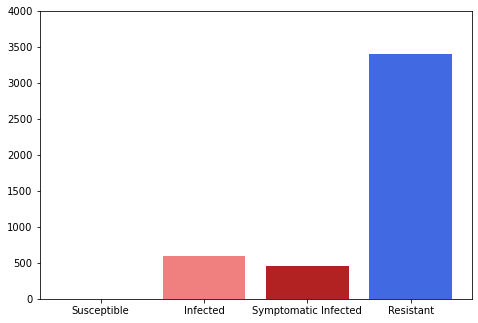

In [110]:
#########################
# Bar Graph Animated Visual #
#########################

from IPython import display
import time

x_ax = ['Susceptible', 'Infected', 'Symptomatic Infected', 'Resistant']
colors = ['gold', 'lightcoral', 'firebrick', 'royalblue']
n_out = []

for n in range(0, len(n_frame), 200):
    display.clear_output(wait=True)
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    y_ax = [n_frame[n][0],n_frame[n][1],n_frame[n][2],n_frame[n][3]]
    for i in range(len(x_ax)):
        ax.bar(x_ax[i],y_ax[i], color=colors[i])
        plt.ylim(0,4000)
    plt.show()
    time.sleep(0)
    n_out.append(n) 

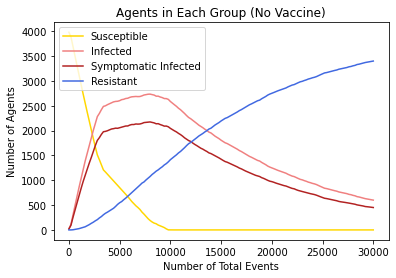

In [111]:
############
# Line graph # This has to come after the bar graph
############

for i in range(4):
    y_ax = []
    for j in n_out:
        y_ax.append(n_frame[j][i])
    plt.plot(n_out, y_ax, label=x_ax[i], color=colors[i])
plt.title('Agents in Each Group (No Vaccine)')
plt.ylabel('Number of Agents')
plt.xlabel('Number of Total Events')
plt.legend()
plt.show()

In [112]:
num_vac = len(V)

tot_inf = 0 
max_inf = 0
for i in range(0, len(n_frame), 200):
    tot_inf += n_frame[i][1]
    if (n_frame[i][1] > max_inf):
        max_inf = n_frame[i][1]

avg_inf = tot_inf/math.ceil(len(n_frame)/200)

print("Total Agents Vaccinated:", num_vac)
print("Average Infected Agents:", avg_inf)
print("Max Infected Agents:", max_inf)
    

Total Agents Vaccinated: 0
Average Infected Agents: 1642.5430463576158
Max Infected Agents: 2734
